# Análise de dados do Ocomon

## Os comando usados aqui seguem o tutorial da HackerLab

### Os dados aqui importados já estão tratatos e com os devidos novos campos adicionados

#### Bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

#### Carregando o arquivo:

In [2]:
# Import DataFrame
# if csv don't are split per ",", then we've to add a new args to method, 
# ex: read_csv('x.csv', sep=';')

#the pattern code to decode file in read_csv() method is utf-8
# if the file don't use this enconde, use enconding='cp1252'
df = pd.read_csv('ocomon_FINAL.csv')

In [3]:
#show the 5 first line from dataframe
df.head()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,NaN,internet,teresina,jaclason machado veras,julia sousa santos,-999999,NaN,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,monitor,monitor,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central
3,desabilite o envio de email como o servico de ...,utilize esta descricao de problema para proble...,N.A,NaN,NaN,teresina,guilherme,guilherme avelino,-999999,NaN,...,13,20,24/10/2011,1,4,4,17,6,26/10/2011,sti_central
4,instalacao de impressoras e remocao de virus ...,NaN,hardware,software,computador,teresina,NaN,bolsista nti,-999999,NP,...,12,13,24/10/2011,1,4,4,9,11,26/10/2011,sti_central


In [4]:
#show the last 5 line from the dataframe
df.tail()

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
15797,computador lentidao preuni cp foi realizado ba...,NaN,software,software,computador,teresina,erica cecilia,bolsista geral 2018,188134,NP,...,15,23,13/9/2019,4,3,3,8,21,17/9/2019,0
15798,computador lento e nao liga formatar apenas se...,NaN,hardware,software,computador,teresina,igor cunha,bolsista geral 2018,175491,NP,...,16,21,13/9/2019,4,3,2,17,47,13/9/2019,0
15799,liga e desliga reinicia sozinho local prospeqi...,NaN,software,software,computador,teresina,joao xavier,bolsista geral 2018,237490,NP,...,16,31,16/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15800,windows corrompidocoordenadoria de avaliacao e...,NaN,software,software,computador,teresina,raphaela da mota silva,bolsista geral 2018,256479,NP,...,17,35,17/9/2019,-1,-1,-1,-1,-1,99/99/9999,0
15801,computador nao liga aberto por felipe a null ...,NaN,hardware,NaN,computador,teresina,lucas lopes,bolsista geral 2018,161603,NP,...,8,54,18/9/2019,-1,-1,-1,-1,-1,99/99/9999,sti_central


In [5]:
#show how many registres has in each column
df.count()

DESCRIB          15802
PROB_ORIG         5853
PROB             15802
ESPC              8066
EQUIP            15589
I_NAME           15466
R_NAME           15433
C_NAME           15802
EQUIP_ID         15802
HAS_VALUE        11063
DEPARTMENT       15774
LOCALE           15583
OPEN_YEAR_4      15802
OPEN_MONTH_4     15802
OPEN_DAY_4       15802
HOUR_OPEN        15802
MIN_OPEN         15802
DATA_OPEN        15802
CLOSE_YEAR_4     15802
CLOSE_MONTH_4    15802
CLOSE_DAY_4      15802
HOUR_CLOSE       15802
MIN_CLOSE        15802
DATA_CLOSE       15802
STI              15774
dtype: int64

In [6]:
#describer the numerics collums
df.describe()

,EQUIP_ID,OPEN_YEAR_4,OPEN_MONTH_4,OPEN_DAY_4,HOUR_OPEN,MIN_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE
count,1.580200e+04,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000
mean,2.535997e+07,2.175990,2.384951,2.667384,12.067397,29.576699,1.736742,2.093532,2.304898,10.966523,25.963802
std,2.321736e+08,1.002167,1.131484,1.134959,2.984860,17.241296,1.282926,1.496906,1.547816,4.987646,18.575372
min,-9.999990e+05,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-9.999990e+05,1.000000,1.000000,2.000000,9.000000,15.000000,1.000000,1.000000,1.000000,9.000000,9.000000
50%,9.943000e+03,2.000000,2.000000,3.000000,11.000000,30.000000,2.000000,2.000000,3.000000,11.000000,26.000000
75%,1.424095e+05,3.000000,3.000000,4.000000,15.000000,44.000000,2.000000,3.000000,4.000000,15.000000,42.000000
max,2.147484e+09,4.000000,4.000000,4.000000,23.000000,59.000000,4.000000,4.000000,4.000000,23.000000,59.000000


In [7]:
#show the type that pandas indentified to each collums
df.dtypes

DESCRIB          object
PROB_ORIG        object
PROB             object
ESPC             object
EQUIP            object
I_NAME           object
R_NAME           object
C_NAME           object
EQUIP_ID          int64
HAS_VALUE        object
DEPARTMENT       object
LOCALE           object
OPEN_YEAR_4       int64
OPEN_MONTH_4      int64
OPEN_DAY_4        int64
HOUR_OPEN         int64
MIN_OPEN          int64
DATA_OPEN        object
CLOSE_YEAR_4      int64
CLOSE_MONTH_4     int64
CLOSE_DAY_4       int64
HOUR_CLOSE        int64
MIN_CLOSE         int64
DATA_CLOSE       object
STI              object
dtype: object

### Gráficos

In [8]:
%matplotlib inline

In [9]:
years_open = []
months_open = []
days_open = []

years_close = []
months_close = []
days_close = []
for D_open, D_close, H_close in df[['DATA_OPEN','DATA_CLOSE','HOUR_CLOSE']].values.tolist():
    dtO = datetime.strptime(D_open, '%d/%m/%Y')
    years_open.append(dtO.year)
    months_open.append(dtO.month)
    days_open.append(dtO.day)
    if H_close == -1:
        years_close.append('NaN')
        months_close.append('NaN')
        days_close.append('NaN')
    else:
        dtC = datetime.strptime(D_close, '%d/%m/%Y')
        years_close.append(dtC.year)
        months_close.append(dtC.month)
        days_close.append(dtC.day)

In [10]:
df['OPEN_YEAR_1'] = years_open
df['OPEN_MONTH_1'] = months_open
df['OPEN_DAY_1'] = days_open

df['CLOSE_YEAR_1'] = years_close
df['CLOSE_MONTH_1'] = months_close
df['CLOSE_DAY_1'] = days_close

In [11]:
#How many problems were opens in each year_4
df['OPEN_YEAR_4'].value_counts(sort=False) 

1    4492
2    6334
3    2679
4    2297
Name: OPEN_YEAR_4, dtype: int64

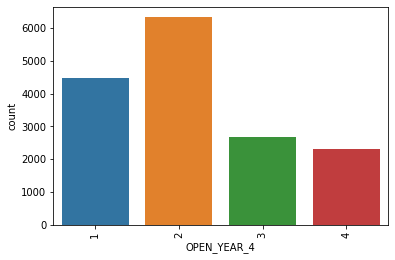

In [12]:
#show the graphic bars to above result 
df['OPEN_YEAR_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_YEAR_4'])

In [13]:
#How many problems were opens in each year
df['OPEN_YEAR_1'].value_counts(sort=True)

2013    3708
2012    3680
2014    2626
2015    1567
2017    1165
2016    1112
2011     812
2018     772
2019     360
Name: OPEN_YEAR_1, dtype: int64

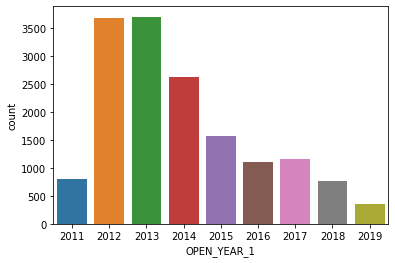

In [14]:
sns.countplot(df['OPEN_YEAR_1'])

### Apartir de 2015 o gráfico mostra um redução e estabilização. Antes disso o número de ocorrências eram muito acima dos valores atuais

In [15]:
#How many problems were opens in each months
df['OPEN_MONTH_4'].value_counts()

1    4659
2    3986
4    3585
3    3572
Name: OPEN_MONTH_4, dtype: int64

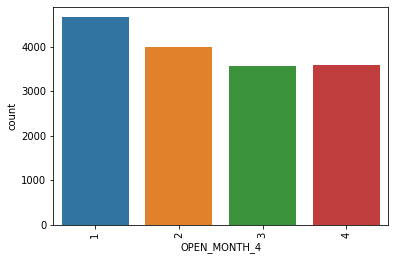

In [16]:
# show the graphic bars to above result
# df['D_MOTH_OPEN'].apply(lambda x: 0 if x == 99 else x).value_counts().sort_index().plot.bar()
df['OPEN_MONTH_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_4'])

In [17]:
#How many problems were opens in each months
df['OPEN_MONTH_1'].value_counts()

3     1748
11    1592
1     1487
4     1462
2     1424
5     1411
9     1244
8     1239
6     1113
7     1089
10    1064
12     929
Name: OPEN_MONTH_1, dtype: int64

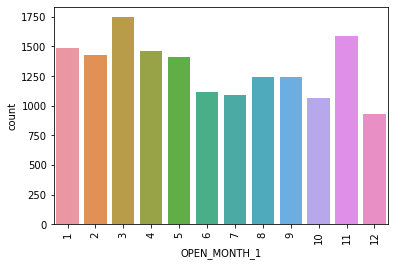

In [18]:
df['OPEN_MONTH_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_MONTH_1'])

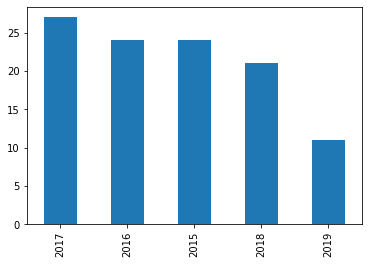

In [19]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().plot.bar()

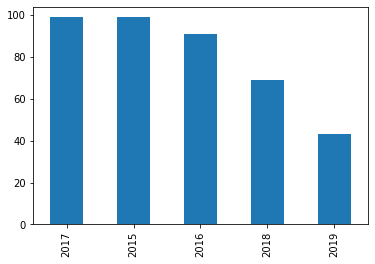

In [20]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().plot.bar()

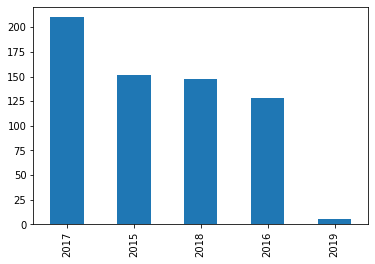

In [21]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().plot.bar()

In [22]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['ESPC'])['ESPC'].count()

ESPC
bateria           176
cabo                4
fonte             401
hd                107
instalacao          2
placa             123
placa de rede      33
placa de video      1
ram                98
software           28
troca              14
Name: ESPC, dtype: int64

In [23]:
df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P')].groupby(['EQUIP'])['EQUIP'].count()

EQUIP
computador       869
estabilizador      4
impressora         2
monitor            3
nobreak          642
notebook          19
Name: EQUIP, dtype: int64

In [24]:
print('Mean of troubles in hd since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in fonte since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in ram since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in bateria since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa de rede since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in placa de video since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in nobreak since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().mean())
print('Mean of troubles in cabo since 2015: ', df[(df['OPEN_YEAR_1'] >= 2015) & (df['HAS_VALUE'] == 'P') & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().mean())

Mean of troubles in hd since 2015:  21.4
Mean of troubles in fonte since 2015:  80.2
Mean of troubles in ram since 2015:  19.6
Mean of troubles in placa since 2015:  24.6
Mean of troubles in bateria since 2015:  35.2
Mean of troubles in placa de rede since 2015:  6.6
Mean of troubles in placa de video since 2015:  1.0
Mean of troubles in nobreak since 2015:  128.4
Mean of troubles in cabo since 2015:  1.3333333333333333


In [25]:
#How many problems were opens in each days
df['OPEN_DAY_4'].value_counts()

4    5133
2    3809
3    3570
1    3290
Name: OPEN_DAY_4, dtype: int64

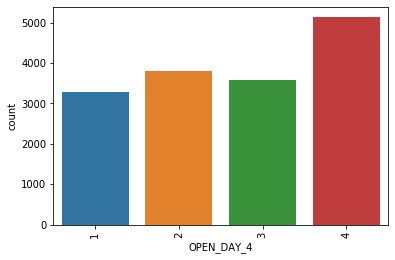

In [26]:
#show the graphic bars to above result 
df['OPEN_DAY_4'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_4'])

In [27]:
#How many problems were opens in each days
df['OPEN_DAY_1'].value_counts()

22    645
23    622
13    604
26    603
20    589
18    568
9     566
14    564
24    543
29    542
12    537
10    530
16    523
2     510
8     506
11    502
27    502
4     498
6     492
7     489
28    486
21    483
15    483
5     474
19    463
17    461
25    460
3     453
30    443
1     374
31    287
Name: OPEN_DAY_1, dtype: int64

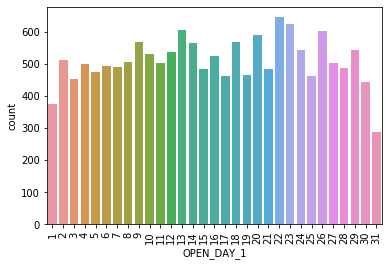

In [28]:
#show the graphic bars to above result 
df['OPEN_DAY_1'].value_counts().sort_index().plot.bar()
sns.countplot(df['OPEN_DAY_1'])

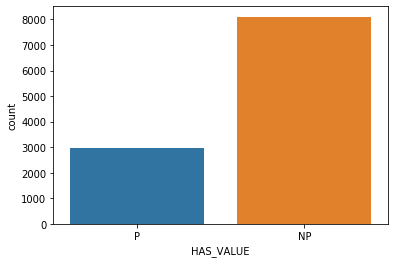

In [29]:
sns.countplot(df['HAS_VALUE'])

In [30]:
# PERCENT OF MISSING PRICING VALUES IN ALL DATASET
(df['HAS_VALUE'].isna().sum() / df['DESCRIB'].count()) * 100

29.98987469940514

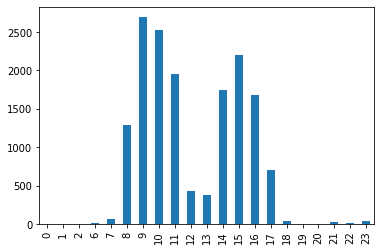

In [31]:
#show the graphic bars to above result 
df['HOUR_OPEN'].value_counts().sort_index().plot.bar()

In [32]:
df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']]

,DATA_OPEN,DATA_CLOSE,HOUR_OPEN,HOUR_CLOSE,MIN_OPEN,MIN_CLOSE
0,18/4/2012,26/4/2012,9,9,15,0
1,23/4/2014,23/4/2014,8,9,13,4
2,24/10/2011,24/10/2011,15,15,43,59
3,24/10/2011,26/10/2011,13,17,20,6
4,24/10/2011,26/10/2011,12,9,13,11
...,...,...,...,...,...,...
15797,13/9/2019,17/9/2019,15,8,23,21
15798,13/9/2019,13/9/2019,16,17,21,47
15799,16/9/2019,99/99/9999,16,-1,31,-1
15800,17/9/2019,99/99/9999,17,-1,35,-1


In [33]:
hour_efic = []
for D_open, D_close, H_open, H_close, M_open, M_close  in df[['DATA_OPEN','DATA_CLOSE','HOUR_OPEN','HOUR_CLOSE','MIN_OPEN','MIN_CLOSE']].values.tolist():
    if H_close == -1:
        hour_efic.append(-1)
    else:
        dtO = datetime.strptime(D_open +" "+ str(H_open) +" "+ str(M_open), '%d/%m/%Y %H %M')
        dtC = datetime.strptime(D_close +" "+ str(H_close) +" "+ str(M_close), '%d/%m/%Y %H %M')
        hour_efic.append(((dtO - dtC).seconds/60)/60)

In [34]:
df['HOUR_EFIC'] = hour_efic
df['HOUR_EFIC']

0         0.250000
1        23.150000
2        23.733333
3        20.233333
4         3.033333
           ...    
15797     7.033333
15798    22.566667
15799    -1.000000
15800    -1.000000
15801    -1.000000
Name: HOUR_EFIC, Length: 15802, dtype: float64

In [35]:
# mean of wasted time to solve a problem in general
df[df['HOUR_EFIC'] > 0]['HOUR_EFIC'].mean()

16.232680968956522

In [36]:
# mean of wasted time to solve a problem in general
df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI'])['HOUR_EFIC'].mean()

STI
biblioteca        17.815891
campus            14.743398
hu                15.529710
sti_biblioteca    12.535000
sti_cca           15.071695
sti_cce           17.702756
sti_cchl          17.495388
sti_central       16.319242
sti_ct            16.742606
Name: HOUR_EFIC, dtype: float64

In [37]:
# mean of wasted time to solve a problem in general
ndf = df[(df['HOUR_EFIC'] > 0) & (df['STI'] != '0')].groupby(['STI', 'ESPC'])['HOUR_EFIC'].mean()

In [38]:
ndf

STI         ESPC         
biblioteca  bateria          23.783333
            fonte            17.506250
            hd               15.255556
            instalacao       20.000000
            placa            12.508333
                               ...    
sti_ct      instalacao       19.332381
            placa            19.730119
            placa de rede    15.120000
            ram              16.380952
            software         17.626667
Name: HOUR_EFIC, Length: 77, dtype: float64

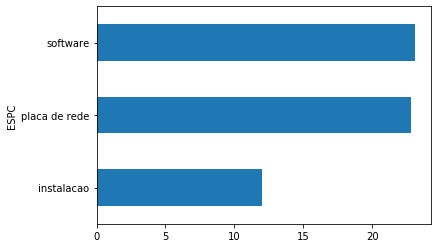

In [39]:
ndf['sti_biblioteca'].plot.barh()

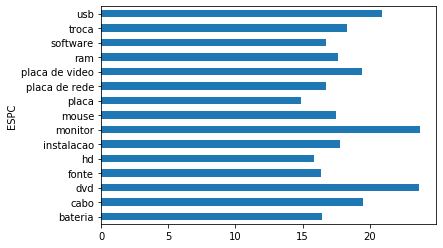

In [40]:
ndf['sti_central'].plot.barh()

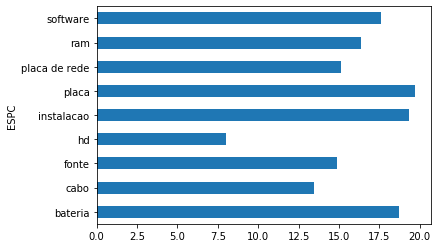

In [41]:
ndf['sti_ct'].plot.barh()

## Media de tempo gasto, por cada setor do STI, em relação a conclusão de problemas precificáveis

In [42]:
# mean of wasted time to solve a princify problem 
ndf = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P')].groupby('STI')['HOUR_EFIC'].mean()

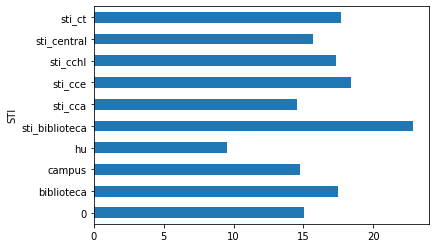

In [43]:
ndf.plot.barh()

## Quantidade Média, minima e máxima de cada produtor precificável agrupada por ano

In [44]:
df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015)]['ESPC'].value_counts()

fonte             342
bateria           108
hd                 97
placa              90
ram                84
placa de rede      28
software           24
troca               7
cabo                4
placa de video      1
instalacao          1
Name: ESPC, dtype: int64

### software não deveria esta na lista de problemas precificáveis

In [45]:
df[(df['HOUR_EFIC'] > 0) 
   & (df['HAS_VALUE'] == 'P') 
   & (df['OPEN_YEAR_1'] >= 2015) 
   & (df['ESPC'] == 'software')
  ]['DESCRIB']

10893    problema no sistema operacional e o teclado na...
10914    erro de inicializacao obs pericia medica forma...
10942    cpu nao inicia corretamente  formatado e troca...
11090    nao ligaformatar e instalar programas solucao ...
11604    nao esta inicializando a placa mae esta conden...
12406    inicializacao defeituosa foi trocada a bateria...
12666    bateria da cpu da prof regilda  bateria trocad...
12930    trocar a bateria do clock bateria trocada comp...
12956    trocar a bateria do clock bateria trocada e cp...
13208    formatacao formatacao de sistema operacional e...
13324    quebrado o computador foi formatado e trocada ...
13538    nao da sinal de tela obs hvu cga o monitor dev...
14295    checagem de computador de laboratorioformataca...
14296    checagem de computador de laboratorioformataca...
14366    nao liga________fazer backup dos documentos fo...
14696    lentotrocar a senha dos usuariosusuario admini...
14698    lento e virus troca de senha sem patrimonio  s.

### Pode-se verificar que as 24 ocorrencias de software **precificáveis** são de fato precificáveis porem a `class ESPC` **não** as classificou corretamente

In [46]:
hd = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts()
fonte = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts()
bateria = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts()
ram = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts()
placaR = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts()
placaV = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts()
placaM = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts()
cabo = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts()
nobreak = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts()
estabilizador = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts()
print(hd)
print(fonte)
print(bateria)
print(ram)
print(placaR)
print(placaV)
print(placaM)
print(cabo)
print(nobreak)
print(estabilizador)

2016    22
2015    22
2018    21
2017    21
2019    11
Name: OPEN_YEAR_1, dtype: int64
2016    89
2015    83
2017    76
2018    61
2019    33
Name: OPEN_YEAR_1, dtype: int64
2018    36
2016    23
2015    22
2017    14
2019    13
Name: OPEN_YEAR_1, dtype: int64
2015    26
2018    21
2016    17
2017    16
2019     4
Name: OPEN_YEAR_1, dtype: int64
2015    13
2016     7
2019     4
2018     2
2017     2
Name: OPEN_YEAR_1, dtype: int64
2016    1
Name: OPEN_YEAR_1, dtype: int64
2016    29
2015    20
2019    16
2018    13
2017    12
Name: OPEN_YEAR_1, dtype: int64
2016    2
2015    1
2019    1
Name: OPEN_YEAR_1, dtype: int64
2016    63
2015    60
2018    28
2017    11
2019     5
Name: OPEN_YEAR_1, dtype: int64
2015    2
2016    1
Name: OPEN_YEAR_1, dtype: int64


## Produtos como cabo, estabilizadores e placas de video não apresentam valores expressivos

In [50]:
plt.rcParams['figure.figsize'] = (15,7)

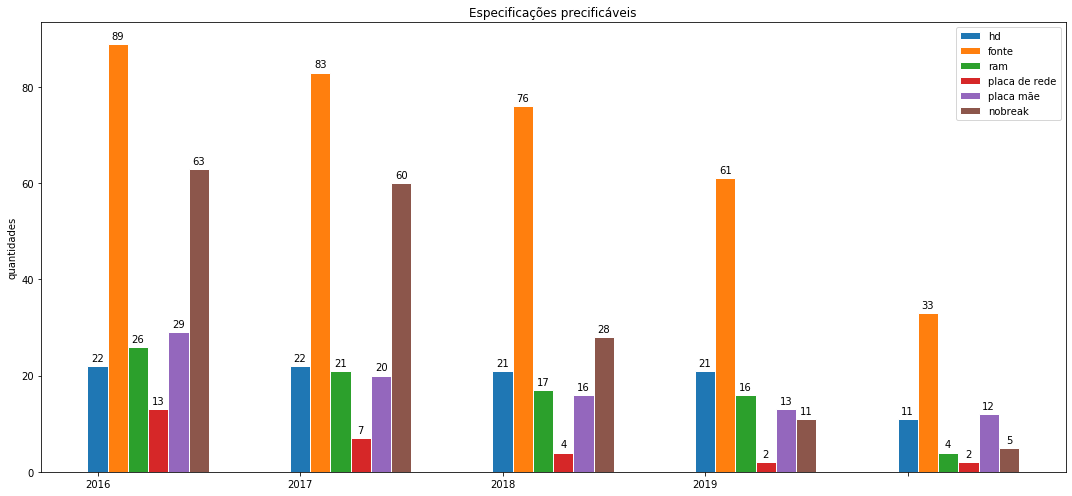

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['2015', '2016', '2017', '2018', '2019']

barWidth = 0.1  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r4]
#r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r6]
r9 = [x + barWidth for x in r8]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, hd.values.tolist(), width=barWidth, edgecolor='white', label='hd')
rects2 = ax.bar(r2, fonte.values.tolist(), width=barWidth, edgecolor='white', label='fonte')
rects3 = ax.bar(r3, ram.values.tolist(), width=barWidth, edgecolor='white', label='ram')
rects4 = ax.bar(r4, placaR.values.tolist(), width=barWidth, edgecolor='white', label='placa de rede')
#rects5 = ax.bar(r5, placaV.values.tolist(), width=barWidth, edgecolor='white', label='placa de video')
rects6 = ax.bar(r6, placaM.values.tolist(), width=barWidth, edgecolor='white', label='placa mãe')
#rects7 = ax.bar(r7, cabo.values.tolist(), width=barWidth, edgecolor='white', label='cabos em geral')
rects8 = ax.bar(r8, nobreak.values.tolist(), width=barWidth, edgecolor='white', label='nobreak')
#rects9 = ax.bar(r9, estabilizador.values.tolist(), width=barWidth, edgecolor='white', label='estabilizador')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('quantidades')
ax.set_title('Especificações precificáveis')
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)
autolabel(rects6)
#autolabel(rects7)
autolabel(rects8)
#autolabel(rects9)

fig.tight_layout()

plt.show()

## Definição dos mínimos

In [170]:
hd_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().mean()
fonte_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().mean()
bateria_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().mean()
ram_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().mean()
placaR_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().mean()
placaV_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().mean()
placaM_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().mean()
cabo_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().mean()
nobreak_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().mean()
estabilizador_min = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().mean()

## Definição dos máximos

In [121]:
hd_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'hd')]['OPEN_YEAR_1'].value_counts().max()
fonte_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'fonte')]['OPEN_YEAR_1'].value_counts().max()
bateria_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'bateria')]['OPEN_YEAR_1'].value_counts().max()
ram_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'ram')]['OPEN_YEAR_1'].value_counts().max()
placaR_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de rede')]['OPEN_YEAR_1'].value_counts().max()
placaV_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa de video')]['OPEN_YEAR_1'].value_counts().max()
placaM_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'placa')]['OPEN_YEAR_1'].value_counts().max()
cabo_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['ESPC'] == 'cabo')]['OPEN_YEAR_1'].value_counts().max()
nobreak_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'nobreak')]['OPEN_YEAR_1'].value_counts().max()
estabilizador_max = df[(df['HOUR_EFIC'] > 0) & (df['HAS_VALUE'] == 'P') & (df['OPEN_YEAR_1'] >= 2015) & (df['EQUIP'] == 'estabilizador')]['OPEN_YEAR_1'].value_counts().max()

# Otimização Multiobjetivo

- Minimixar f(x1,x2,x3,x4,x5,x6) = - x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6;
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - x2 - 0*x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - x3 - 0*x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - x4 - 0*x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - x3 - 0*x6; 
- Minimixar f(x1,x2,x3,x4,x5,x6) = - 0*x1 - 0*x2 - 0*x3 - 0*x4 - 0*x3 - x6; 

- g(x1,x2,x3,x4,x3,x6) = - x1*valueX1 - x2*valueX2 - x3*valueX3 - x4*valueX4 - x5*valueX5 - x6*valueX6 >= Orcamento

- f(x1,x2,x3,x4,x5,x6) → x1 <= mean.x2ear(x1) or x1 <= Minimixar.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 <= mean.x2ear(x2) or x2 <= Minimixar.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 <= mean.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 <= mean.x2ear(x4) or x4 <= Minimixar.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 <= mean.x2ear(x3) or x3 <= Minimixar.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 <= mean.x2ear(x6) or x6 <= Minimixar.year(x6)

- f(x1,x2,x3,x4,x5,x6) → x1 >= 0 or x1 >= min.year(x1)
- f(x1,x2,x3,x4,x5,x6) → x2 >= 0 or x2 <= min.year(x2)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 <= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x4 >= 0 or x4 >= min.year(x4)
- f(x1,x2,x3,x4,x5,x6) → x3 >= 0 or x3 >= min.year(x3)
- f(x1,x2,x3,x4,x5,x6) → x6 >= 0 or x6 >= min.year(x6)

* x1 = hd;
* x2 = fonte;
* x3 = ram;
* x4 = nb; 
* x5 = placaR;
* x6 = placaM;

In [194]:
valueX1 = 250
valueX2 = 450
valueX3 = 100
valueX4 = 1200
valueX5 = 100
valueX6 = 600

In [195]:
# conda install -c conda-forge autograd

In [214]:
# first, import PuLP
import pulp

# then, conduct initial declaration of problem
linearProblem = pulp.LpProblem("Maximizing for first objective",pulp.LpMinimize)

# delcare optimization variables, using PuLP
x1 = pulp.LpVariable("x1", lowBound=hd_min, upBound=hd_max)  
x2 = pulp.LpVariable("x2", lowBound=fonte_min, upBound=fonte_max)
x3 = pulp.LpVariable("x3", lowBound=ram_min, upBound=ram_max)
x4 = pulp.LpVariable("x4", lowBound=nobreak_min, upBound=nobreak_max)
x5 = pulp.LpVariable("x5", lowBound=placaR_min, upBound=placaR_max)
x6 = pulp.LpVariable("x6", lowBound=placaM_min, upBound=placaM_max)

# add (first) objective function to the linear problem statement
linearProblem += x1*valueX1 + x2*valueX2 + x3*valueX3 + x4*valueX4 + x5*valueX5 + x6*valueX6

# add the constraints to the problem
linearProblem += x1*valueX1 + x2*valueX2 + x3*valueX3 + x4*valueX4 + x5*valueX5 + x6*valueX6 <= 90000

# solve with default solver, maximizing the first objective
solution = linearProblem.solve()

# output information if optimum was found, what the maximal objective value is and what the optimal point is
print(str(pulp.LpStatus[solution])+
      "\n min value R$ = "+str(pulp.value(linearProblem.objective))+
      "\n hd = "+str(pulp.value(x1))+
      "\n fonte = "+str(pulp.value(x2))+
      "\n ram = "+str(pulp.value(x3))+
      "\n nobreak = "+str(pulp.value(x4))+
      "\n placaR = "+str(pulp.value(x5))+
      "\n placaM = "+str(pulp.value(x6)))

Optimal
 min value R$ = 88750.0
 hd = 19.4
 fonte = 68.4
 ram = 16.8
 nobreak = 33.4
 placaR = 5.6
 placaM = 18.0
